# Classifications

1) Load data

2) Train models, test and evaluate

3) Save models

Classification methods: 
- random forest
- decision tree
- xgboost

Ressources:

https://marcotcr.github.io/lime/tutorials/Tutorial%20-%20continuous%20and%20categorical%20features.html

https://medium.com/mlearning-ai/shap-force-plots-for-classification-d30be430e195
https://stackoverflow.com/questions/65549588/shap-treeexplainer-for-randomforest-multiclass-what-is-shap-valuesi

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from evaluation import evaluation_classification

import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sn

from joblib import dump

In [2]:
# read all prepared data

# shuffled vs not shuffled data (one additional randomization before splitting)

name_array = ["X_train_sub", "y_train_sub", "X_exp_train_sub", "y_exp_train_sub", \
              "X_train", "y_train", "X_test", "y_test", \
              "X_exp_train", "y_exp_train", "X_exp_test", "y_exp_test", \
              "X_test_urban", "y_test_urban", "X_test_rural", "y_test_rural"]
name_data = []

for i in range(len(name_array)):
    name_data.append(np.load("mobility_data/network_new_split_shuffled/" + name_array[i] + ".npy", allow_pickle=True))

X_train_sub, y_train_sub, X_exp_train_sub, y_exp_train_sub, \
X_train, y_train, X_test, y_test, \
X_exp_train, y_exp_train, X_exp_test, y_exp_test, \
X_test_urban, y_test_urban, X_test_rural, y_test_rural = \
name_data[0], name_data[1], name_data[2], name_data[3], \
name_data[4], name_data[5], name_data[6], name_data[7], \
name_data[8], name_data[9], name_data[10], name_data[11], \
name_data[12], name_data[13], name_data[14], name_data[15]

In [3]:
# train models

rf = RandomForestClassifier(random_state = 0, n_estimators=100)
dt = DecisionTreeClassifier(random_state = 0)
xgb = XGBClassifier(random_state = 0)

rf.fit(X_train_sub, y_train_sub)
dt.fit(X_train_sub, y_train_sub)
xgb.fit(X_train_sub, y_train_sub)

/home/laura/miniconda3/envs/late/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:51:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [11]:
print(np.shape(X_test), np.shape(X_test_urban), np.shape(X_test_rural))

(477, 18) (185, 18) (292, 18)


In [4]:
# full test data set
print(dt.score(X_test, y_test))
print(rf.score(X_test, y_test))
print(xgb.score(X_test, y_test))

0.4276729559748428
0.5157232704402516
0.49056603773584906


In [5]:
# urban regions
print(dt.score(X_test_urban, y_test_urban))
print(rf.score(X_test_urban, y_test_urban))
print(xgb.score(X_test_urban, y_test_urban))

0.7135135135135136
0.8540540540540541
0.7891891891891892


In [6]:
# rural regions
print(dt.score(X_test_rural, y_test_rural))
print(rf.score(X_test_rural, y_test_rural))
print(xgb.score(X_test_rural, y_test_rural))

0.2465753424657534
0.3013698630136986
0.3013698630136986


## Extended Evaluation

total number of mismatches 273
accuracy 0.428


class zero
204
positive diff
1 58
2 32
3 17
4 8
5 9
6 1
7 0
8 0
9 0
negative diff
1 68
2 31
3 22
4 9
5 7
6 5
7 1
8 5
9 0
abs diff
1 126
2 63
3 39
4 17
5 16
6 6
7 1
8 5
9 0


total absolute difference / number of misclassified elements
0.21978021978021978


total absolute difference / number of total test elements (MAE)
0.12578616352201258
MAE imbalanced
1.2578616352201257


()

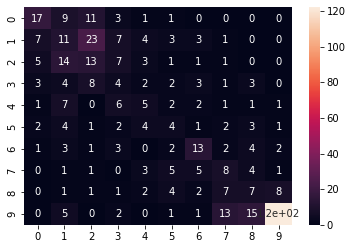

In [7]:
# decision tree
evaluation_classification([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], X_test, y_test, dt)

total number of mismatches 231
accuracy 0.516


class zero
246
positive diff
1 42
2 30
3 15
4 2
5 0
6 0
7 0
8 0
9 0
negative diff
1 56
2 42
3 21
4 15
5 5
6 1
7 1
8 1
9 0
abs diff
1 98
2 72
3 36
4 17
5 5
6 1
7 1
8 1
9 0


total absolute difference / number of misclassified elements
0.2008658008658009


total absolute difference / number of total test elements (MAE)
0.09727463312368974
MAE imbalanced
0.9727463312368972


()

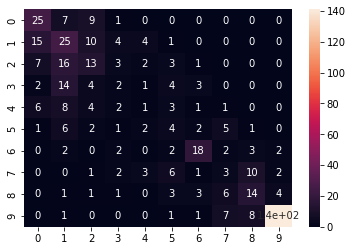

In [8]:
# random forest
evaluation_classification([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], X_test, y_test, rf)

total number of mismatches 243
accuracy 0.491


class zero
234
positive diff
1 35
2 34
3 14
4 4
5 2
6 1
7 0
8 0
9 0
negative diff
1 65
2 46
3 23
4 11
5 6
6 1
7 1
8 0
9 0
abs diff
1 100
2 80
3 37
4 15
5 8
6 2
7 1
8 0
9 0


total absolute difference / number of misclassified elements
0.20164609053497942


total absolute difference / number of total test elements (MAE)
0.10272536687631027
MAE imbalanced
1.0272536687631026


()

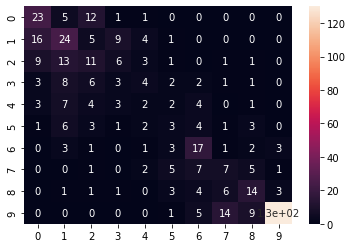

In [9]:
# xgboost
evaluation_classification([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], X_test, y_test, xgb)

In [10]:
# save models

#path = "models/"
path = "models_shuffled/"

dump(dt, path + "decision_tree.joblib")
dump(rf, path + "random_forest.joblib")
dump(xgb, path + "xgboost.joblib")

['models_shuffled/xgboost.joblib']